In [ ]:
!mamba install control slycot 2>&1 >/dev/null

In [25]:
import numpy as np
import control
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12,'font.family':'verdana'})
plt.rcParams['figure.dpi'] = 120
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


    Eigenvalue (pole)       Damping     Frequency
              -0.6565             1        0.6565
    0.1183   +0.3678j       -0.3062        0.3864
    0.1183   -0.3678j       -0.3062        0.3864


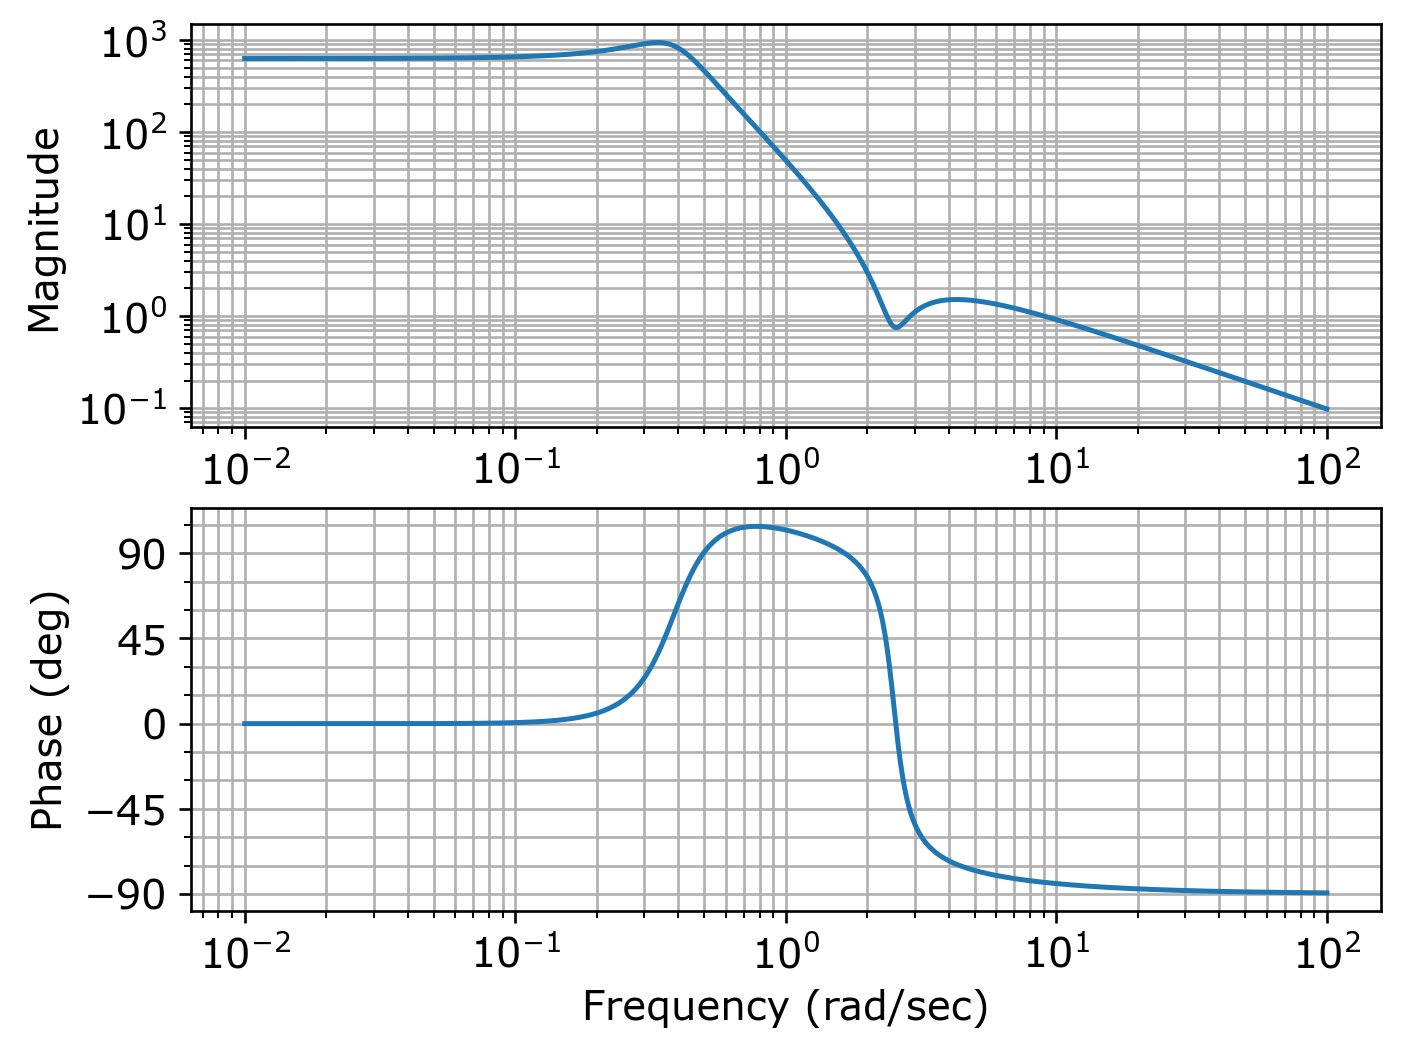

In [37]:
w = np.logspace(-2, 2, 1000)
t = np.linspace(0, 40, 1000)

nG = 9.8 * np.array([1, -.5, 6.3])
dG = np.polymul([1, .6565], [1, -.2366, .1493])
G = control.TransferFunction(nG, dG)
control.damp(G)
control.bode(G, w); plt.show()
control.nyquist(G, w);

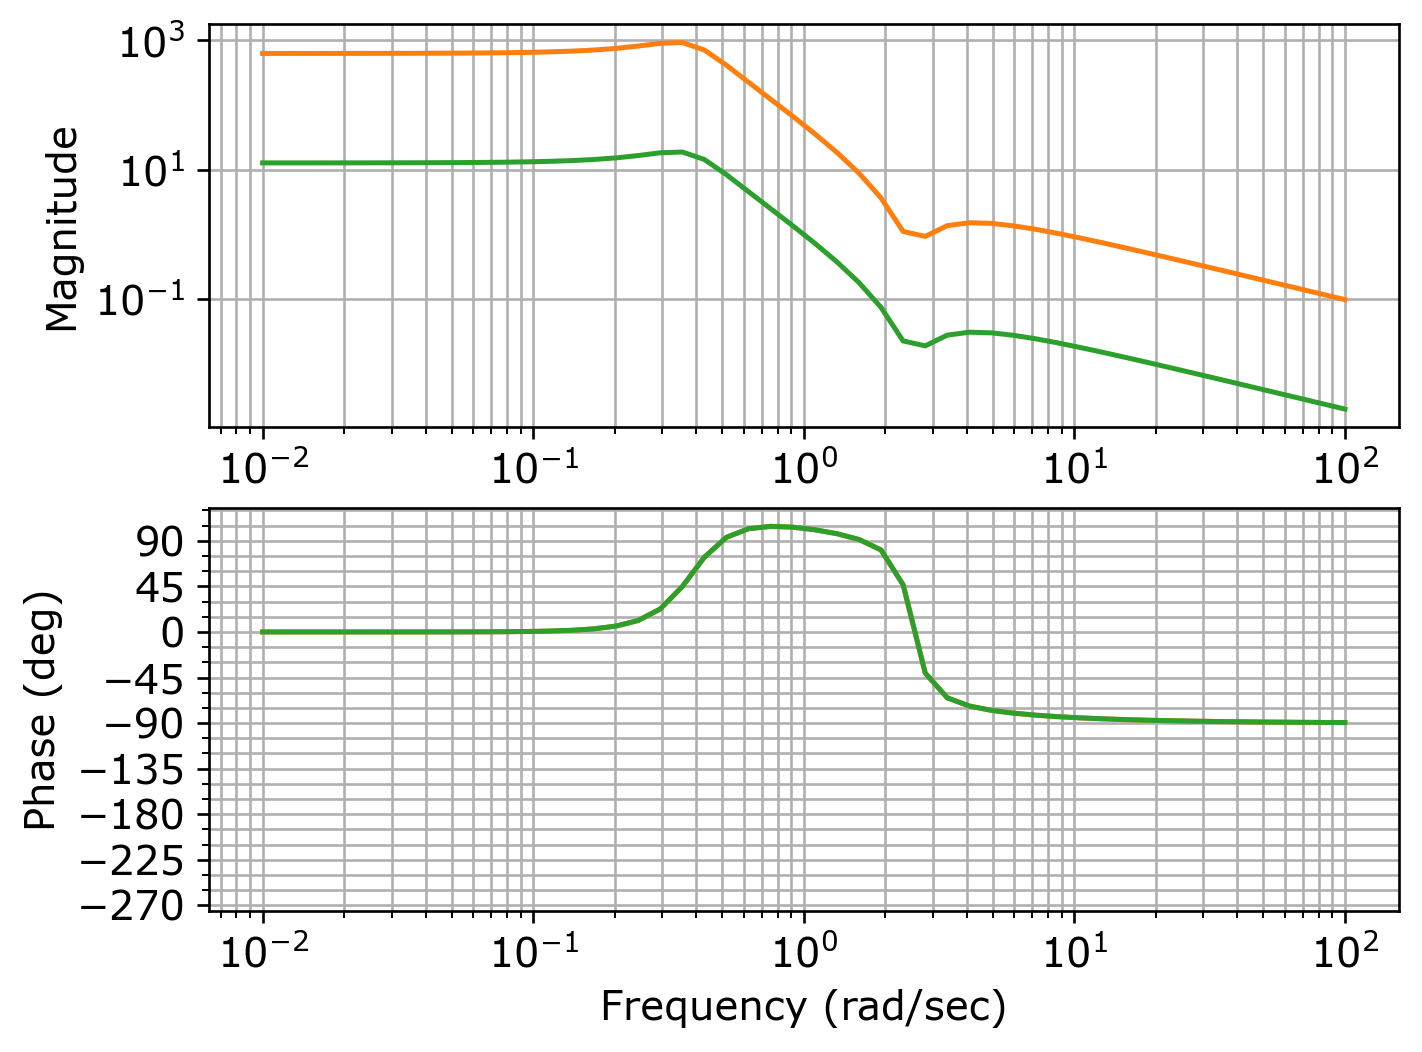

In [5]:
wc = 1
mag, ph, omega = control.bode(G, wc)
K0 = 1 / mag
control.bode(G,w); control.bode(K0*G, w);

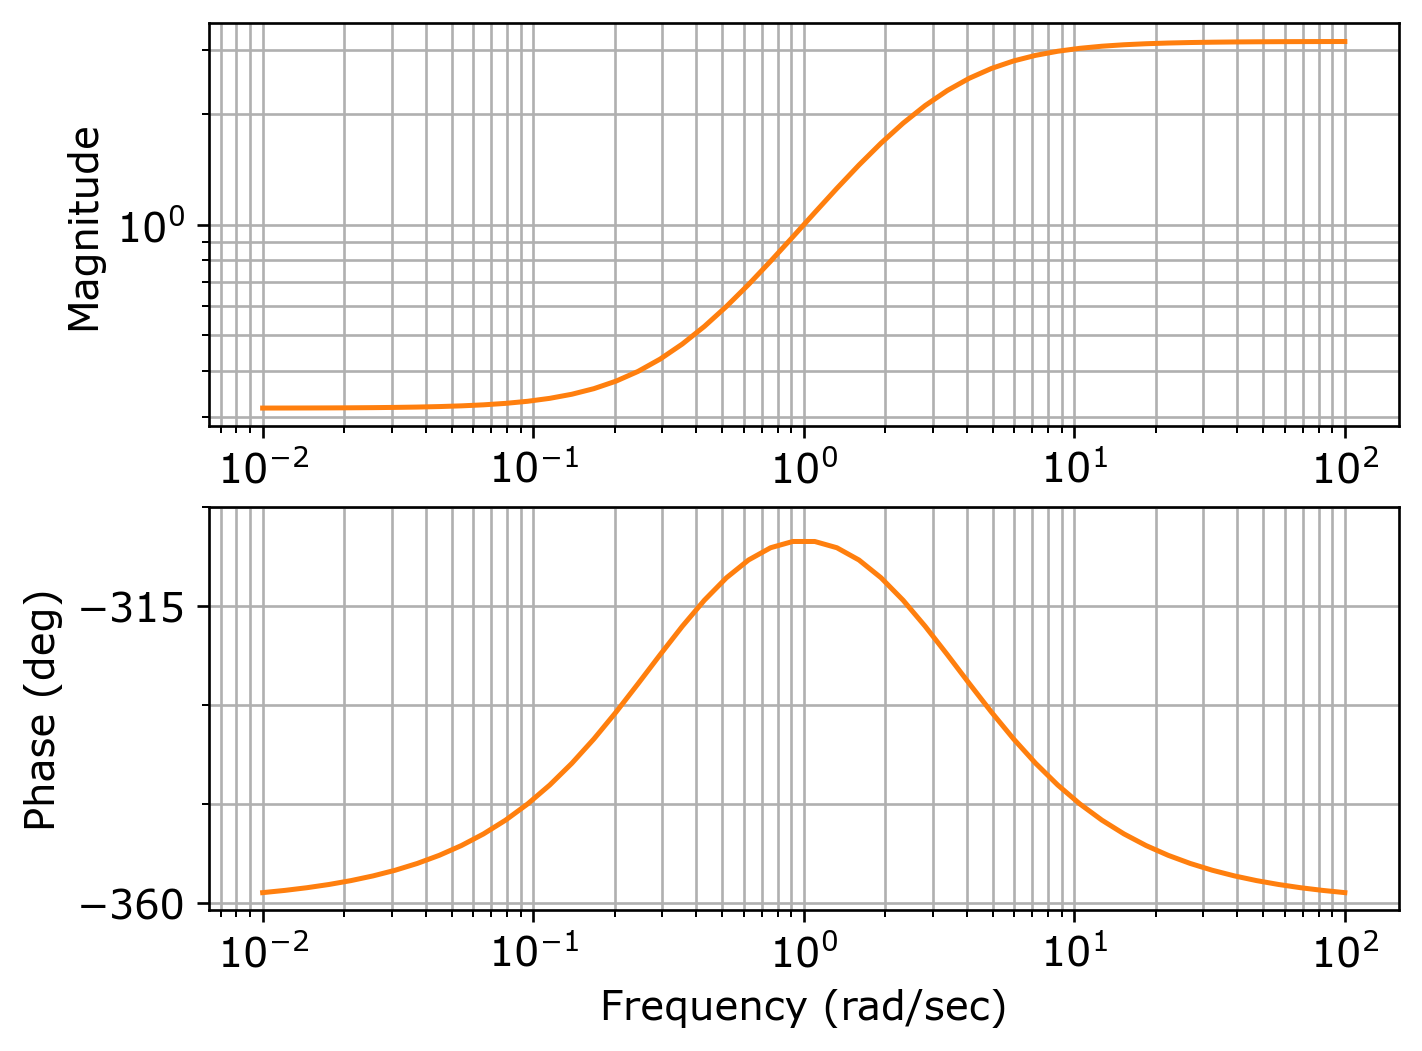

In [6]:
a = np.sqrt(10)
K1 = control.TransferFunction(a * np.array([1, wc/a]), [1, a*wc])
mag, ph, _ = control.bode(K1, wc)
control.bode(K1, w);

/var/folders/gr/prz_ps9n1g378r8w0vw1xvqm0000gn/T/ipykernel_11316/3552644839.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  control.bode([G*K0, G*K], w, wrap_phase=True); plt.clf()


-2

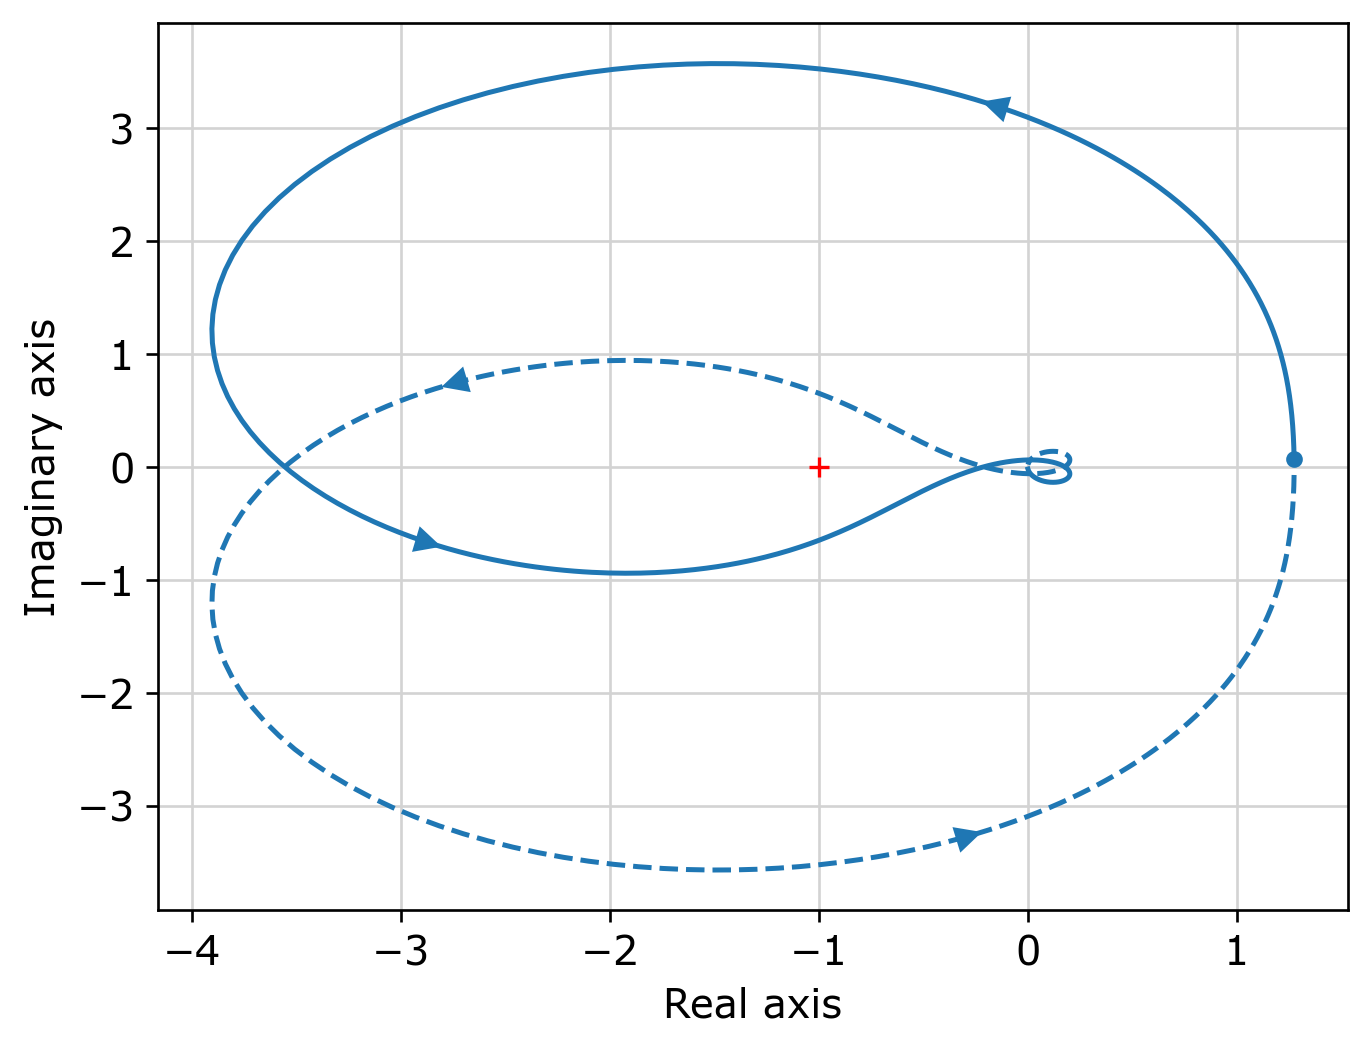

In [24]:
K = K0 * K1 * K1
# mag, ph, _ = control.bode(K, w)
control.bode([G*K0, G*K], w, wrap_phase=True);
# control.nyquist_plot(G*K, w);

[-356.74951006 -356.71941478 -356.68904107 -356.65838636 -356.62744806
 -356.59622354 -356.56471017 -356.53290529 -356.5008062  -356.46841019
 -356.43571451 -356.40271641 -356.3694131  -356.33580175 -356.30187954
 -356.26764358 -356.23309099 -356.19821885 -356.16302422 -356.12750411
 -356.09165553 -356.05547545 -356.01896082 -355.98210855 -355.94491553
 -355.90737862 -355.86949465 -355.83126043 -355.79267273 -355.75372829
 -355.71442383 -355.67475603 -355.63472154 -355.594317   -355.55353899
 -355.51238407 -355.47084878 -355.42892962 -355.38662305 -355.34392552
 -355.30083341 -355.25734311 -355.21345095 -355.16915323 -355.12444624
 -355.07932619 -355.03378931 -354.98783175 -354.94144965 -354.89463911
 -354.84739619 -354.79971692 -354.7515973  -354.70303328 -354.65402078
 -354.60455568 -354.55463384 -354.50425105 -354.45340309 -354.40208569
 -354.35029454 -354.29802531 -354.2452736  -354.192035   -354.13830504
 -354.08407922 -354.02935299 -353.97412178 -353.91838096 -353.86212586
 -353.

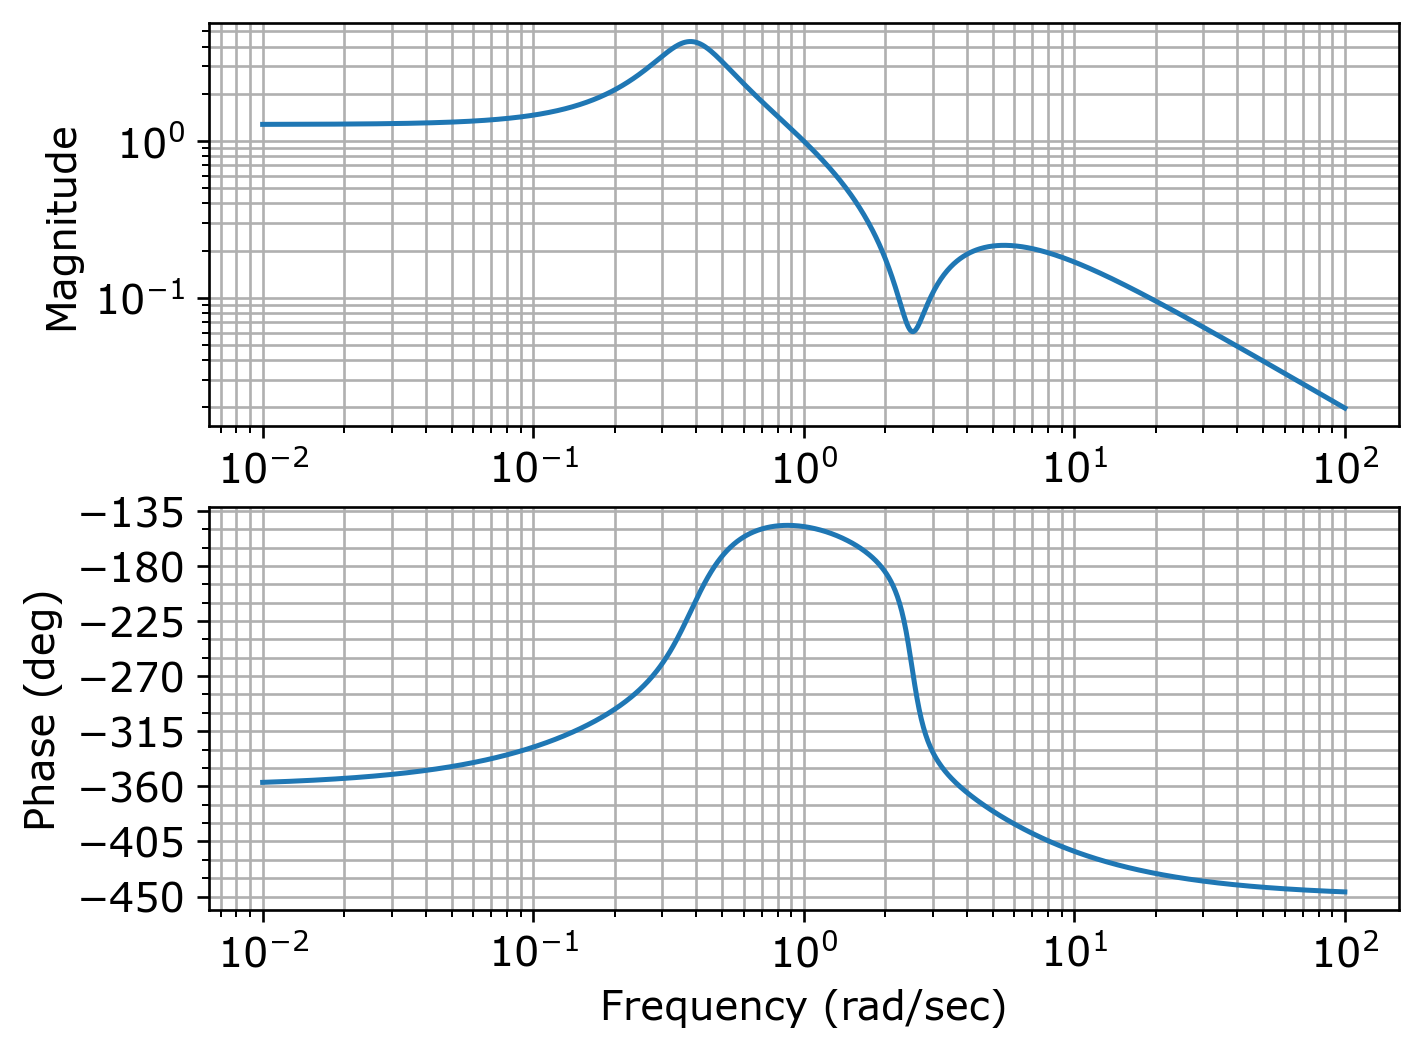

In [40]:
L = K * G
ph_deg = np.rad2deg(ph)
print(ph_deg)
gm, pm, wg, wp = control.margin(L) # gain margin, phase margin, gain crossover, phase crossover
mag, ph, omega = control.bode(L, w)
print(f"Gain margin: {20 * np.log10(gm):.2f} dB")
print(f"Phase margin: {pm:.2f} deg")

In [15]:
T = control.feedback(L)
control.damp(T) # control.pole(T)
t, y = control.step_response(T, t)
plt.plot(t, y); plt.title('Time Response'); plt.xlabel('Time'); plt.ylabel('Amplitude'); plt.grid(True); plt.show()

    Eigenvalue (pole)       Damping     Frequency
               -7.234             1         7.234
   -0.3929    +1.076j         0.343         1.145
   -0.3929    -1.076j         0.343         1.145
   -0.3542    +0.331j        0.7306        0.4848
   -0.3542    -0.331j        0.7306        0.4848
